In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.preprocessing import StandardScaler

In [15]:
data = pd.read_csv('../Datasets/Car_Model.csv')

In [16]:
data["Horsepower"].replace(0,data['Horsepower'].mean())

TypeError: Could not convert 13016515015014019822021522519017016015022595959785884687909511390215200210193889095?1001051008810016517515315018017017511072100888690707665696070958054908616517515015315020815516019097150130140150112768769869297808817515014513715019815015815021522517510510010088954615016717018010088729490851079014523049759111215011012218095?100100678065751001101051401501501401508367785261757575979367951057272170145150148110105110951101101297583100789671979770909588981155386819279831401501201521001058190526070531007811095717075721021508810812018014513015068805896701451101451301101051009818017019014978887589638367789711011048665270601101401391059585881009010585110120145165139140689597759510585971031251151337168115858890110130129138135155142125150716580807712571907070656990115115907660706590889090789075927565105654848676767?676213210088?72848492110845864606765626863656574?7575100748076116120110105888588888885849092?746868637088757067676711085921129684908652847982 to numeric

In [17]:
data.head()

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,NaN,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,NaN,140,3449,10.5,70.0,1,ford torino


In [18]:
data.drop(columns = ["Horsepower","Carname"],inplace = True)

In [19]:
dis_mean = data["displacement"].mean()

In [20]:
year_mean = data["ModelYear"].mean()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   displacement  393 non-null    float64
 3   Weight        398 non-null    int64  
 4   accelaration  398 non-null    float64
 5   ModelYear     392 non-null    float64
 6   Version       398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [22]:
data["displacement"].fillna(dis_mean, inplace = True)
data["ModelYear"].fillna(year_mean, inplace = True)


<Axes: xlabel='displacement', ylabel='Weight'>

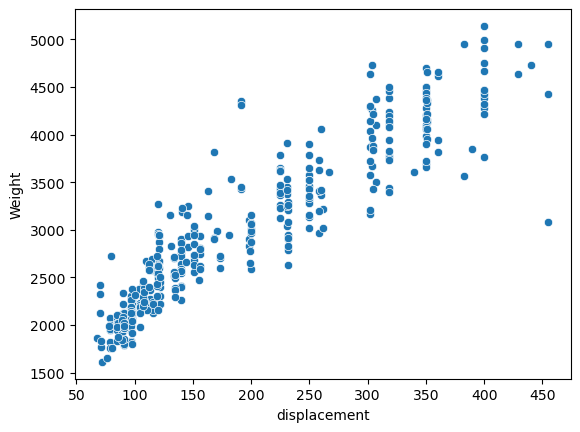

In [23]:
sns.scatterplot(data=data, x = data.iloc[:,2], y = data.iloc[:,3])

In [24]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-0.7064387 ,  1.49819126,  1.1423175 , ..., -1.29549834,
        -1.68688144, -0.71514478],
       [-1.09075062,  1.49819126,  1.56568384, ..., -1.47703779,
        -1.68688144, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.25062052, ..., -1.65857724,
        -1.68688144, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.55114787, ..., -1.4407299 ,
         1.630464  , -0.71514478],
       [ 0.57460104, -0.85632057, -0.6988338 , ...,  1.10082237,
         1.630464  , -0.71514478],
       [ 0.95891297, -0.85632057, -0.70867953, ...,  1.39128549,
         1.630464  , -0.71514478]])

In [25]:
scaler.transform(data)

array([[-0.7064387 ,  1.49819126,  1.1423175 , ..., -1.29549834,
        -1.68688144, -0.71514478],
       [-1.09075062,  1.49819126,  1.56568384, ..., -1.47703779,
        -1.68688144, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.25062052, ..., -1.65857724,
        -1.68688144, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.55114787, ..., -1.4407299 ,
         1.630464  , -0.71514478],
       [ 0.57460104, -0.85632057, -0.6988338 , ...,  1.10082237,
         1.630464  , -0.71514478],
       [ 0.95891297, -0.85632057, -0.70867953, ...,  1.39128549,
         1.630464  , -0.71514478]])

In [26]:
data = pd.DataFrame(scaler.transform(data))

In [27]:
x = data.iloc[:,0:1]
y = data.iloc[:,2]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.6286133184739231


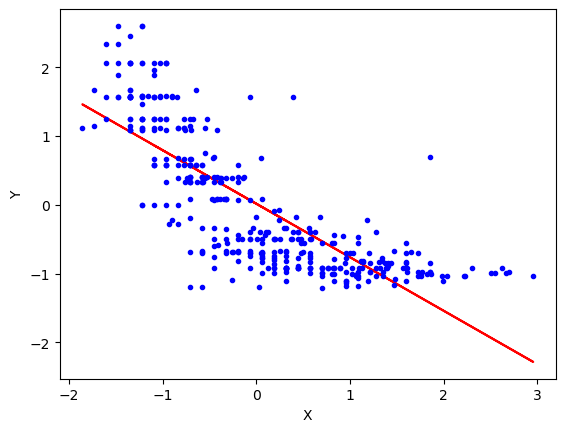

In [30]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [31]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [32]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.7591600363251949


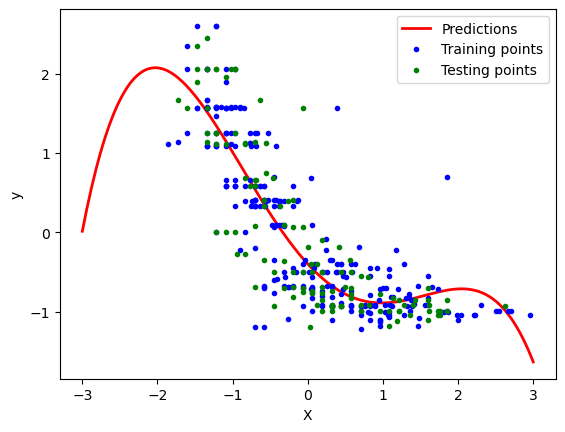

In [33]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()